## Analysing the impact of rainfall on crop yield 
Done by Nicholas Dale (falconpunch082)

Objective: To determine how rainfall impacts crop yield of different crops
            by creating a DataFrame containing relevant columns and then
            creating a scatter plot of rainfall vs crop yield for each
            unique crop in the dataset.

In [1]:
# Creating dependencies for setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
from scipy.stats import linregress

**Data Synthesis and Cleanup**

In [2]:
# Creating file paths for each .csv file
crop_csv = Path("resources/crop_yield.csv")

# Creating DataFrames from each .csv file
crop = pd.read_csv(crop_csv)

# removing any results from both DataFrames that contain null values
crop.dropna(how='any')

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [3]:
# Previewing crop DataFrame
crop.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
# Picking out relevant columns
crop_cleaned = crop[['Crop', 'Crop_Year', 'State', 'Annual_Rainfall', 'Yield']]

# Displaying created DataFrame
crop_cleaned.head()

,Crop,Crop_Year,State,Annual_Rainfall,Yield
0,Arecanut,1997,Assam,2051.4,0.796087
1,Arhar/Tur,1997,Assam,2051.4,0.710435
2,Castor seed,1997,Assam,2051.4,0.238333
3,Coconut,1997,Assam,2051.4,5238.051739
4,Cotton(lint),1997,Assam,2051.4,0.420909


In [5]:
# As determined in temperature_analysis.ipynb, the top 5 crops are: rice, maize, moong, urad and groundnut
# Unlike temperature, annual rainfall is provided for each state each year.
warnings.filterwarnings('ignore')

# Creating new DataFrames grouped by crop
rice = crop_cleaned[crop_cleaned['Crop'] == 'Rice']
maize = crop_cleaned[crop_cleaned['Crop'] == 'Maize']
moong = crop_cleaned[crop_cleaned['Crop'] == 'Moong(Green Gram)']
urad = crop_cleaned[crop_cleaned['Crop'] == 'Urad']
groundnut = crop_cleaned[crop_cleaned['Crop'] == 'Groundnut']

# Sorting by state and year for beautification purposes (they do not have any impact in this analysis).
# Unlike the temperature analysis, rainfall provided is for each state each year, therefore no
# generalisation is done in this analysis.
rice = rice.groupby(['State', 'Crop_Year']).sum().reset_index()
maize = maize.groupby(['State', 'Crop_Year']).sum().reset_index()
moong = moong.groupby(['State', 'Crop_Year']).sum().reset_index()
urad = urad.groupby(['State', 'Crop_Year']).sum().reset_index()
groundnut = groundnut.groupby(['State', 'Crop_Year']).sum().reset_index()

In [6]:
# Creating .csv files of each DataFrame for viewing
rice.to_csv("output/rice_rainfall.csv")
maize.to_csv("output/maize_rainfall.csv")
moong.to_csv("output/moong_rainfall.csv")
urad.to_csv("output/urad_rainfall.csv")
groundnut.to_csv("output/groundnut_rainfall.csv")

**Data Visualisation**

In [7]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_sq = rvalue ** 2
    
    return regress_values, line_eq, rvalue

The r-value is: 0.534236127839147


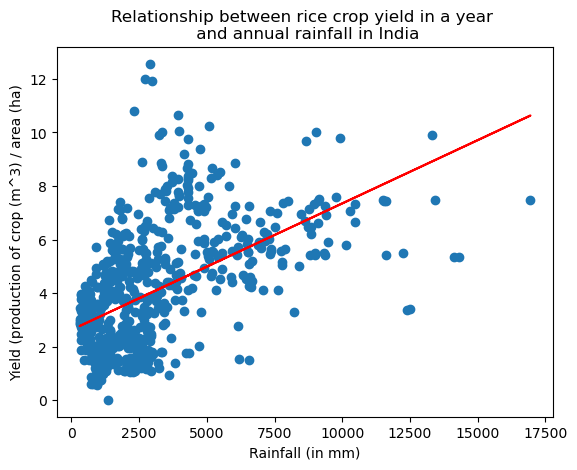

In [8]:
# Rice vs. Rainfall visualisation
rice['Annual_Rainfall'] = rice['Annual_Rainfall'].astype('float')
rice['Yield'] = rice['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(rice['Annual_Rainfall'], rice['Yield'])
plt.scatter(rice['Annual_Rainfall'], rice['Yield'])
plt.plot(rice['Annual_Rainfall'], regress_values, "r-")
plt.title("Relationship between rice crop yield in a year \n and annual rainfall in India")
plt.xlabel("Rainfall (in mm)")
plt.ylabel("Yield (production of crop (m^3) / area (ha)")
print(f"The r-value is: {rvalue}")
plt.savefig("output/rice_yield_rainfall.png")
plt.show()

There is a strong and positive relationship between rice crop yield and rainfall, suggesting that the rice crop yield is likely to increase as amount of rainfall increases.

The r-value is: 0.08584566839245647


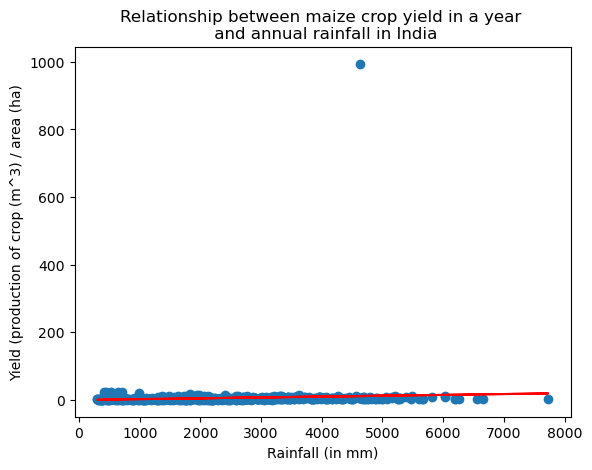

In [9]:
# Maize vs. Rainfall visualisation
maize['Annual_Rainfall'] = maize['Annual_Rainfall'].astype('float')
maize['Yield'] = maize['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(maize['Annual_Rainfall'], maize['Yield'])
plt.scatter(maize['Annual_Rainfall'], maize['Yield'])
plt.plot(maize['Annual_Rainfall'], regress_values, "r-")
plt.title("Relationship between maize crop yield in a year \n and annual rainfall in India")
plt.xlabel("Rainfall (in mm)")
plt.ylabel("Yield (production of crop (m^3) / area (ha)")
print(f"The r-value is: {rvalue}")
plt.savefig("output/maize_yield_rainfall.png")
plt.show()

There is no significant relationship between maize crop yield and rainfall.

Considering that the scatter plot for the relationship between maize crop yield and temperature is similar to this scatter plot, it is safe to say that maize probably works differently to other crops in that both temperature and rainfall do not impact on its growth.

The r-value is: 0.5585930727211041


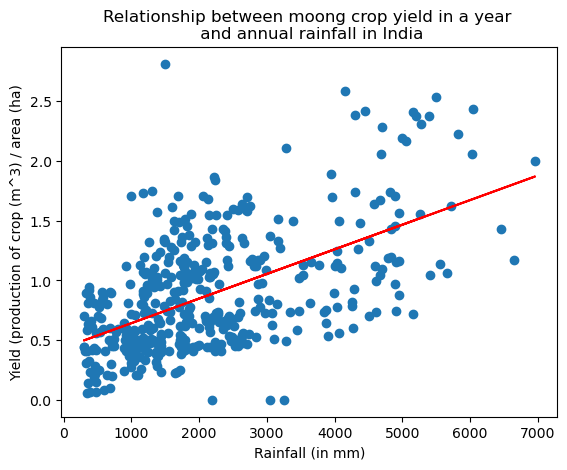

In [10]:
# Moong vs. Rainfall visualisation
moong['Annual_Rainfall'] = moong['Annual_Rainfall'].astype('float')
moong['Yield'] = moong['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(moong['Annual_Rainfall'], moong['Yield'])
plt.scatter(moong['Annual_Rainfall'], moong['Yield'])
plt.plot(moong['Annual_Rainfall'], regress_values, "r-")
plt.title("Relationship between moong crop yield in a year \n and annual rainfall in India")
plt.xlabel("Rainfall (in mm)")
plt.ylabel("Yield (production of crop (m^3) / area (ha)")
print(f"The r-value is: {rvalue}")
plt.savefig("output/moong_yield_rainfall.png")
plt.show()

There is a moderate and positive relationship between moong crop yield and rainfall, suggesting that the moong crop yield may tend to increase as amount of rainfall increases.

The r-value is: 0.5067055069489327


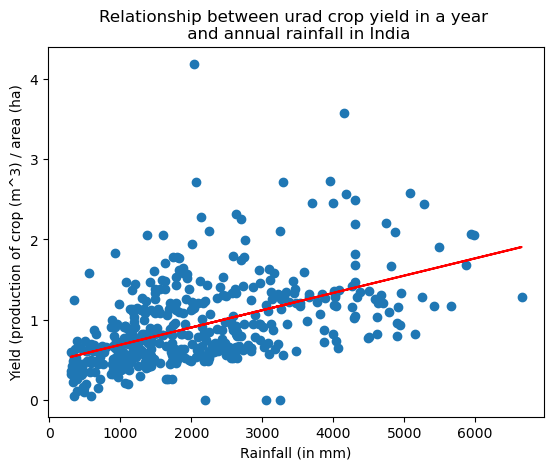

In [11]:
# Urad vs. Temperature visualisation
urad['Annual_Rainfall'] = urad['Annual_Rainfall'].astype('float')
urad['Yield'] = urad['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(urad['Annual_Rainfall'], urad['Yield'])
plt.scatter(urad['Annual_Rainfall'], urad['Yield'])
plt.plot(urad['Annual_Rainfall'], regress_values, "r-")
plt.title("Relationship between urad crop yield in a year \n and annual rainfall in India")
plt.xlabel("Rainfall (in mm)")
plt.ylabel("Yield (production of crop (m^3) / area (ha)")
print(f"The r-value is: {rvalue}")
plt.savefig("output/urad_yield_rainfall.png")
plt.show()

There is a moderate and positive relationship between urad crop yield and rainfall, suggesting that the urad crop yield nay tend to increase as amount of rainfall increases.

The r-value is: 0.6210760232727783


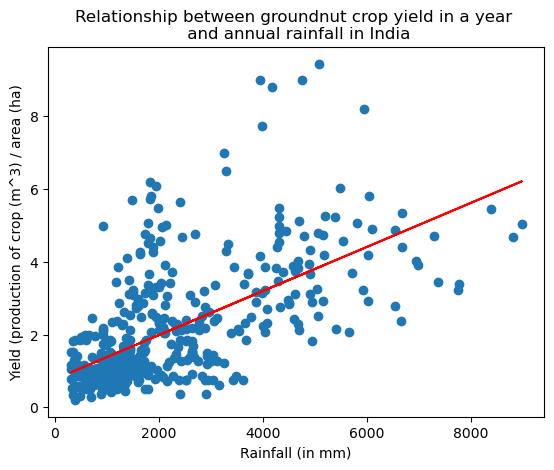

In [12]:
# Groundnut vs. Rainfall visualisation
groundnut['Annual_Rainfall'] = groundnut['Annual_Rainfall'].astype('float')
groundnut['Yield'] = groundnut['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(groundnut['Annual_Rainfall'], groundnut['Yield'])
plt.scatter(groundnut['Annual_Rainfall'], groundnut['Yield'])
plt.plot(groundnut['Annual_Rainfall'], regress_values, "r-")
plt.title("Relationship between groundnut crop yield in a year \n and annual rainfall in India")
plt.xlabel("Rainfall (in mm)")
plt.ylabel("Yield (production of crop (m^3) / area (ha)")
print(f"The r-value is: {rvalue}")
plt.savefig("output/groundnut_yield_rainfall.png")
plt.show()

There is a strong and positive relationship between groundnut crop yield and rainfall, suggesting that the groundnut crop yield is likely to increase as amount of rainfall increases.